# dogs vs cats classification

## (without neural networks)

In [64]:
import pandas as pd
import glob
import cv2 
import os, cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

# plot cat photos from the 'dogs vs cats' dataset

we see that there are different sizes and colors to every image, we will need to resize and change the color in order to reduce varience and make an accurate model.

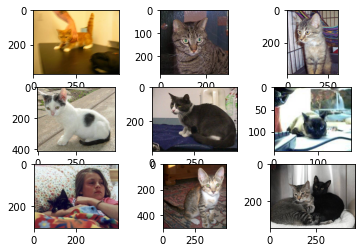

In [26]:

folder = 'train2/'

for i in range(9):
#pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1) # dimension of plot
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

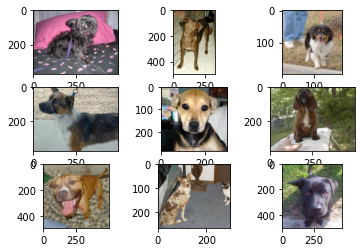

In [3]:
# plot dog photos from the 'dogs vs cats' dataset
folder = 'train2/'

for i in range(9):
  #  pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1)
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# resize and coloring images

we created function for reading images, change their color and size in order to have a normalized data.

gets file path and returns vector of the resized image in grayScale. Turning the color to gray and reduce dimensions.

In [4]:
# resize the images and change their color so they will have the same size and colors.
def readImg_gray(file_path):
    img = imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert an image from one color space to another
    resized_img = cv2.resize(gray_img, (50,50)) 
    return resized_img

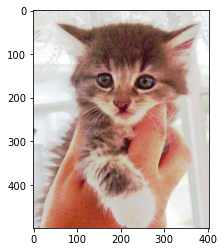

(499, 403, 3)
603291


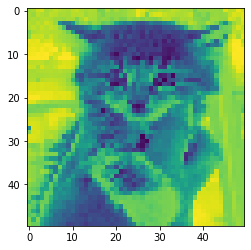

(50, 50)
2500


In [5]:
# an example of how it works 

img = imread('train2/cat.100.jpg')
pyplot.imshow(img)
pyplot.show()
# h, w, c = img.shape
# print('width:  ', w)
# print('length: ' , l)
print(img.shape) 
print(img.size) # rows, columns and depth/number of color channels - always 3, because it contains the degrees of red,blue and green in each image.
# print(len(img))
# print(width(img))
img_gray=readImg_gray('train2/cat.100.jpg')
pyplot.imshow(img_gray)
pyplot.show()
print(img_gray.shape) # rows and columns  - 2 dimensions and depth is 1 because there is only one degree of color - gray
print(img_gray.size)

conclusion:

The depth of the image is 1, but grayscale is actually composed of 2 dimentions: x and y. Color image composed of 3 dimentions. x, y, and depth of 3.

Now, we will use the readImg_gray function we built in order to build a new function, that will create a df of cats and a df of dogs.

# making df for cats and dogs

In [6]:
def make_df(name, num):    
    m=12500 # num of rows in df ,there are 12500 cat images and 12500 dog images
    size =50*50 # num of columnns in df - image size
    X = np.ndarray((m,size), dtype=np.uint8)
    # 2d array of images - m is the number of inner-arrays i.e the elements of the array, size is the size of each element - image (inner-array)
    y = np.zeros((m,1))
    # 2d array of zeroes - will represent the target column
    folder = 'train2/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg') # read each image
        X[i,:] = np.squeeze(img.reshape((size,1))) # lower dimension of array and reshape so that each image will be a row in the df 
        y[i,0] = num # the label of the data - cat 0 or dog 1

        df = pd.DataFrame(X)
        df['label'] = y
        print(X)
    return df

In [7]:
#creating two data frames , one for cat images and the  other for dog images
df_cat = make_df('cat',0)
df_dog = make_df('dog',1)


[[150 158 164 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 15

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  57  26]
 [ 69  45  52 ...  54  40  31]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 16

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 16

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 16

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89  54 ... 239 229 229]
 [164 171 157 ... 204 208 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 162 159 ...  77  80  78]
 [ 88  89

In [10]:
# concating the two dfs
df = pd.concat([df_cat, df_dog])
df.shape

# dropping the target column from X
y = df['label']
X = df.drop(['label'], axis=1).to_numpy()

# train test split

In [11]:
# מוסכמה - דאטא מבחן 10 אחוז, ראנדום סטייט=42
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, shuffle = True)

X_train_Total, X_test_Final, y_train_Total, y_test_Final = train_test_split(X, y, test_size = 0.1, random_state = 42)



# preprocessing

In [ ]:
# normalization of the data
X_train_Total=X_train_Total.astype('float32')
X_test_Final=X_test_Final.astype('float32')


X_train_Total /=255
X_test_Final /=255

# splliting again in order to use validation set for evaluating each model
X_train, X_test, y_train, y_test = train_test_split(X_train_Total, y_train_Total,
                                                                test_size = 0.1, random_state = 42)

 # PCA - DIMENSIONALITY REDUCTION

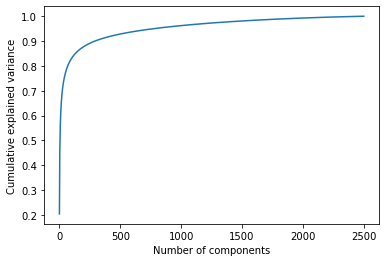

In [12]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced=pca.transform(X_test)
variances = pca.explained_variance_ratio_
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
# plt.plot([0,300],[0.75,0.75],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

In [18]:
pca = PCA(n_components=0.92)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced=pca.transform(X_test) 
X_test_Final_reduced = pca.transform(X_test_Final)

In [19]:
print("number of dimensions", X_train_reduced.shape[1])

number of dimensions 425


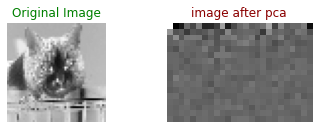

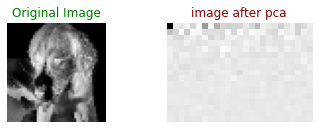

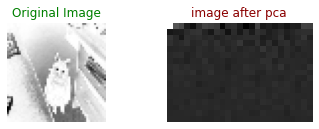

In [21]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(50,50), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(17,25), cmap="gist_yarg")
    plt.title("image after pca", color = "Darkred")
    plt.axis("off")
    plt.show()

In [22]:
X_recovered = pca.inverse_transform(X_train_reduced)

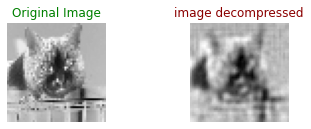

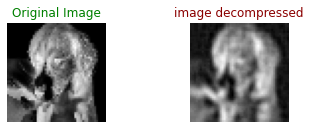

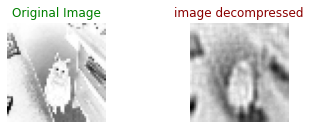

In [27]:
# TO SHOW THAT PCA DIDN'T RUIN THE DATASET 
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(50,50), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_recovered[i].reshape(50,50), cmap="gist_yarg")
    plt.title("image decompressed", color = "Darkred")
    plt.axis("off")
    plt.show()

# dummy model

In [29]:

from sklearn.dummy import DummyClassifier
# defining the strategy
dummy_clf = DummyClassifier(strategy="most_frequent",random_state=42) # the stategy means that the dummy will classify every image as the class that has more data

dummy_clf.fit(X_train_reduced, y_train)

y_pred = dummy_clf.predict_proba(X_test_reduced)

# #accuracy
dummy_clf.score(y_pred, y_test)

0.5026666666666667

# MODELS

the models we chose:
 *   naive baise
 *   logistic regression
 *   random forest
 *   Adaboost
 *   Xgboost
 *   voting (hard) 
    

# GaussianNB

In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
gnb_pca = GaussianNB()
gnb_pca=gnb.fit(X_train_reduced,y_train)
gnb_pca.score(X_train_reduced, y_train)

0.5708641975308641

# knn

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [148]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [149]:
knn.score(X_train_reduced,y_train)

0.733679012345679

In [150]:
scores_knn =cross_val_score(knn, X_train_reduced, y_train, cv=5, scoring='accuracy')

In [76]:
# after simple cross validation, we can see that the scores aren't as high as knn.score showed
scores_knn 

array([0.58765432, 0.5762963 , 0.5982716 , 0.58839506, 0.57135802])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.57      0.58      0.58      1119
         1.0       0.58      0.57      0.58      1131

    accuracy                           0.58      2250
   macro avg       0.58      0.58      0.58      2250
weighted avg       0.58      0.58      0.58      2250



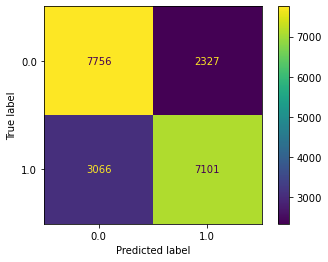

In [151]:
# with pca
y_pred_knn = knn.predict(X_test_reduced)

plot_confusion_matrix(knn,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_log))

# logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [59]:
log_reg_pca = LogisticRegression(solver='saga',penalty='l1',random_state=42)
log_reg_pca=log_reg_pca.fit(X_train_reduced, y_train)

In [60]:
log_reg_pca.score(X_train_reduced,y_train)

0.597037037037037

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.57      0.58      0.58      1119
         1.0       0.58      0.57      0.58      1131

    accuracy                           0.58      2250
   macro avg       0.58      0.58      0.58      2250
weighted avg       0.58      0.58      0.58      2250



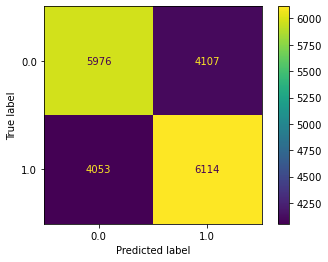

In [77]:
# with pca
y_pred_log = log_reg_pca.predict(X_test_reduced)

plot_confusion_matrix(log_reg_pca,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_log))

# random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
# with pca
randf_model_pca = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 0, max_depth = 5)

In [72]:
randf_model_pca.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=0)

In [73]:
randf_model_pca.score(X_train_reduced, y_train)

0.7199012345679012

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      1119
         1.0       0.62      0.63      0.62      1131

    accuracy                           0.62      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.62      0.62      0.62      2250



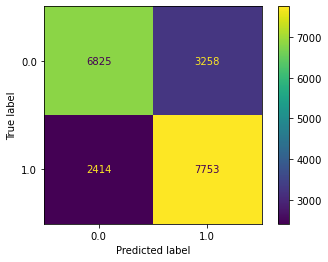

In [189]:
# #make predictions on the testing set (predict for first_test)
y_pred_randf = randf_model_pca.predict(X_test_reduced)

plot_confusion_matrix(randf_model_pca,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_randf))

# Ensemble Learning Methods

# Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:

clf_ada_pca = AdaBoostClassifier(n_estimators=300, random_state=42, learning_rate=0.1)

In [140]:
#with pca
clf_ada_pca.fit(X_train_reduced, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42)

In [143]:
# without SAMME and learning rate= 1 : 0.6536
clf_ada_pca.score(X_train_reduced, y_train)

0.6455308641975309

In [89]:
# # without SAMME and learning rate= 1 : 0.6536
# clf_ada_pca.score(X_train_reduced, y_train)

0.6207901234567901

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      1119
         1.0       0.62      0.64      0.63      1131

    accuracy                           0.62      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.62      0.62      0.62      2250



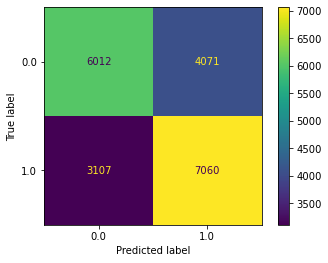

In [144]:
# #make predictions on the testing set (predict for first_test)
y_pred_ada = clf_ada_pca.predict(X_test_reduced)

plot_confusion_matrix(clf_ada_pca,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_ada))

# XGBoost

In [185]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic",n_estimators=300,learning_rate=0.1,max_depth=6 ,random_state=42,early_stopping_rounds=5, eval_metric="auc")

In [186]:
# xgb_model_acc = xgb.XGBClassifier(objective="binary:logistic",n_estimators=100,learning_rate=0.1,max_depth=5 , random_state=42, eval_metric="auc")

In [187]:
xgb_model.fit(X_train_reduced, y_train,  eval_set=[(X_test_reduced, y_test)])

[0]	validation_0-auc:0.61159
[1]	validation_0-auc:0.62334
[2]	validation_0-auc:0.62639
[3]	validation_0-auc:0.62995
[4]	validation_0-auc:0.63273
[5]	validation_0-auc:0.63725
[6]	validation_0-auc:0.63847
[7]	validation_0-auc:0.64019
[8]	validation_0-auc:0.64212
[9]	validation_0-auc:0.64652
[10]	validation_0-auc:0.64494
[11]	validation_0-auc:0.64497
[12]	validation_0-auc:0.64661
[13]	validation_0-auc:0.64980
[14]	validation_0-auc:0.65218
[15]	validation_0-auc:0.65474
[16]	validation_0-auc:0.65548
[17]	validation_0-auc:0.65743
[18]	validation_0-auc:0.65929
[19]	validation_0-auc:0.65945
[20]	validation_0-auc:0.65876
[21]	validation_0-auc:0.66231
[22]	validation_0-auc:0.66431
[23]	validation_0-auc:0.66483
[24]	validation_0-auc:0.66575
[25]	validation_0-auc:0.66604
[26]	validation_0-auc:0.66556
[27]	validation_0-auc:0.66651
[28]	validation_0-auc:0.66832
[29]	validation_0-auc:0.66803
[30]	validation_0-auc:0.66819
[31]	validation_0-auc:0.66937
[32]	validation_0-auc:0.66952
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
# xgb_model.fit(X_train_reduced, y_train, early_stopping_rounds=5, eval_set=[(X_test_reduced, y_test)])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63      1119
         1.0       0.64      0.65      0.64      1131

    accuracy                           0.64      2250
   macro avg       0.64      0.64      0.64      2250
weighted avg       0.64      0.64      0.64      2250



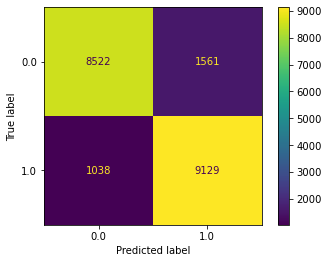

In [188]:
# xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred_xg = xgb_model.predict(X_test_reduced)

plot_confusion_matrix(xgb_model,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_xg))
# metrics.accuracy_score(y_test, y_pred_xg)



# voting classifier

In [161]:
from sklearn.ensemble import VotingClassifier

In [162]:
# low - learning rate , maximum depth, subsampling and column subsampling 
# high -for the number of estimators, regularization and weights in child nodes 
xgboost_model=xgb.XGBClassifier(n_estimators=200)

In [173]:
gnb = GaussianNB()

In [176]:
# change to naive baise in the beggingi?
voting_clf = VotingClassifier(
 estimators=[('gnb',gnb),('rf', randf_model_pca),('xg',xgboost_model)],
 voting='soft',n_jobs=-1) # change the weights

In [154]:
# voting_clf1 = VotingClassifier(
#  estimators=[('log_reg',log_reg_pca),('rf', randf_model_pca),('xg',xgboost_model1)],
#  voting='soft',n_jobs=-1) # change the weights

In [177]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 n_jobs=-1, voting='soft')

In [178]:
# overfitting with knn, random forest and xgboost OR IN LOGISTIC random and xgboost
voting_clf.score(X_train_reduced, y_train)

0.7159012345679012

In [179]:
# # with empty xgboost: 0.6396
# voting_clf.score(X_train_reduced, y_train)

In [180]:
# voting_clf1.score(X_train_reduced, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63      1119
         1.0       0.62      0.48      0.54      1131

    accuracy                           0.59      2250
   macro avg       0.60      0.59      0.59      2250
weighted avg       0.60      0.59      0.59      2250



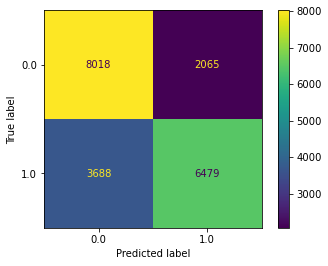

In [181]:
y_pred_voting = voting_clf.predict(X_test_reduced)

plot_confusion_matrix(voting_clf,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_voting))
# metrics.accuracy_score(y_test, y_pred_xg)

In [ ]:
# improve voting classifier , know how to explain well xgboost, the dirrerence between the ensembles methods and the hyperparameters we used

# improve random forest

# SCORES

our best score is : XGBoost -0.64 accuracy

In [193]:
#final model:
y_pred_final =xgb_model.predict(X_test_Final_reduced)
xgb_score= accuracy_score(y_test_Final,y_pred_final)
xgb_score
# plot_confusion_matrix(xgb_model,X_train_reduced,y_train)
# metrics.accuracy_score(y_test, y_pred_xg)
    

0.6152

In [194]:
print(classification_report(y_test_Final,y_pred_final))


              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62      1298
         1.0       0.59      0.63      0.61      1202

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.62      0.62      0.62      2500

